Evaluation using [Recall@N](https://medium.com/@m_n_malaeb/recall-and-precision-at-k-for-recommender-systems-618483226c54)

`Recall@k = (# of recommended items @k that are relevant) / (total # of relevant items)`

Basically, the code for a single image:
```python
true_relations      = ['man deks at', 'man deks at', 'woman guitar plays', 'man glass holds']
predicted_relations = ['man deks at', 'man deks at', 'boy chair on', 'man phone holds', 'girl dog interacts_with']

correct_predictions = 0
for true_relation, true_box in zip(true_relations, true_box):
    if true_relation is in zip(predicted_relations, predicted_box):
        correct_predictions = correct_predictions+1

2/4 = 50%
...

# Finally, score for all images
score = sum(correct_predictions_list) / true_relation_lists
```

***
```
Number of train images:	51487
Number of test images:	 5700

Number of train image boxes:			 174106
Number of matched train image boxes:	 104172
Number of detected train image boxes:	2081465

Number of test image boxes:			 6520
Number of matched test image boxes:	 6513
Number of detected test image boxes:	111786

IOU threshold=0.89

Number of correct test relations predicted for all images: 
IOU threshold=0.89
Score = 1476 / 6520 = 0.2263

IOU threshold=0.5
Score = 2124 / 6520 = 0.3257

```

06ee6768846c3125


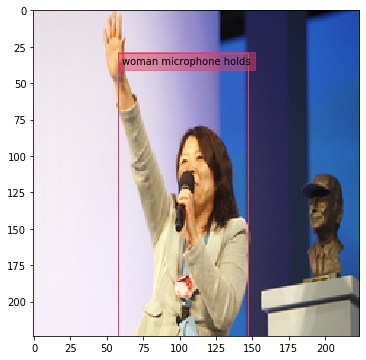

Predicted captions:
['woman microphone holds']
True captions:
['woman microphone holds']


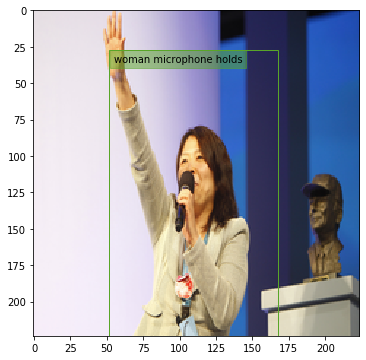

97be0e858f7446df


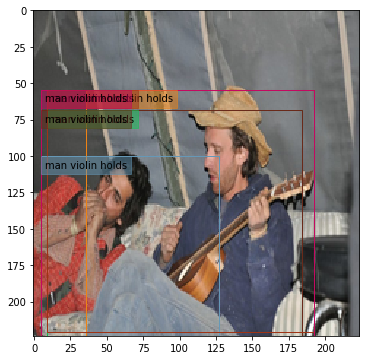

Predicted captions:
['man violin holds', 'man violin holds', 'man violin holds', 'man violin holds', 'man violin holds', 'man violin holds']
True captions:
['man guitar holds', 'man guitar plays']


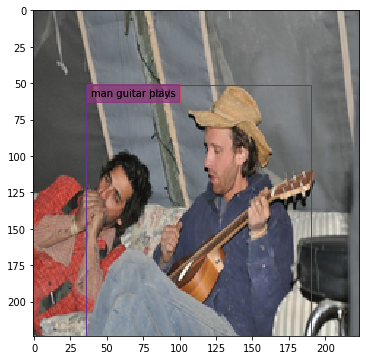

2f9b4cbfbec7ab11


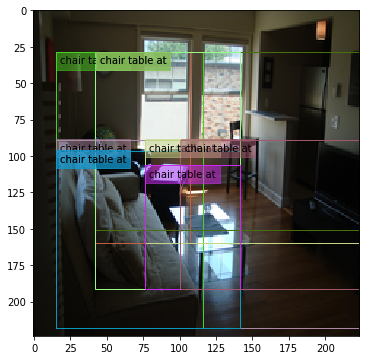

Predicted captions:
['chair table at', 'chair table at', 'chair table at', 'chair table at', 'chair table at', 'chair table at', 'chair table at', 'chair table at', 'chair table at', 'chair table at']
True captions:
['chair table at']


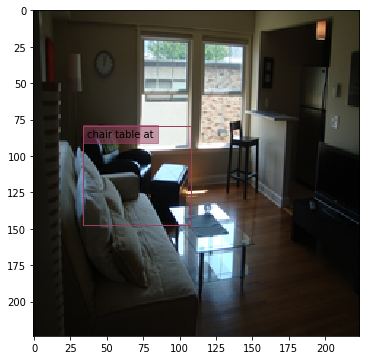

00a677c35918cb34


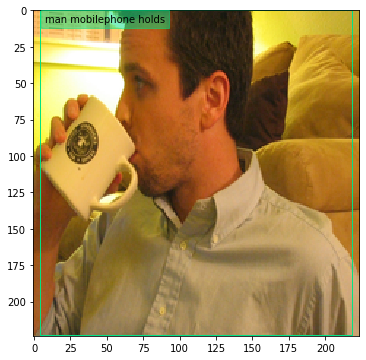

Predicted captions:
['man mobilephone holds']
True captions:
['man coffeecup holds']


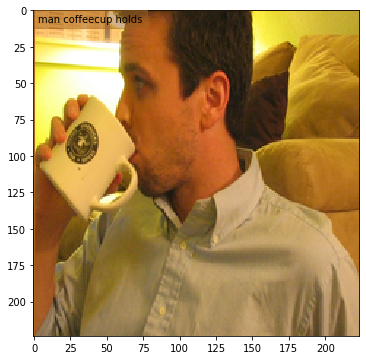

18bfcee7cb1194dd


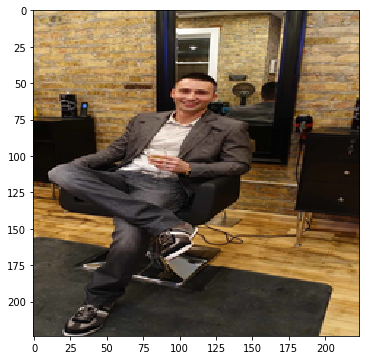

Predicted captions:
['man chair on']
True captions:
['man chair on']


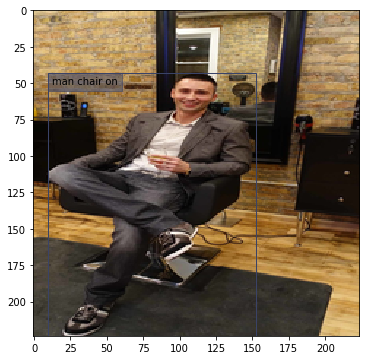

68100bc5799f9f5a


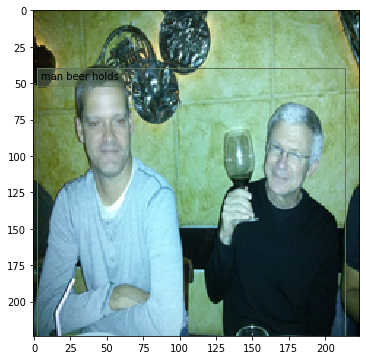

Predicted captions:
['man beer holds']
True captions:
['man wineglass holds']


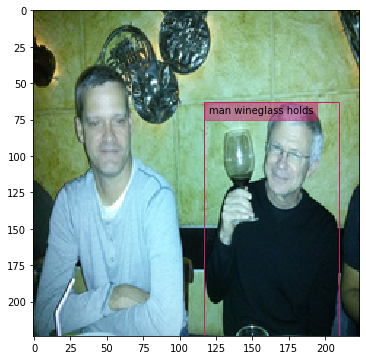

33d199e7554f2908


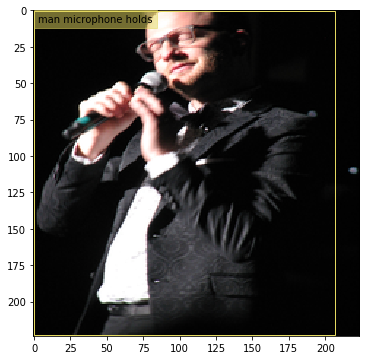

Predicted captions:
['man microphone holds']
True captions:
['man microphone holds']


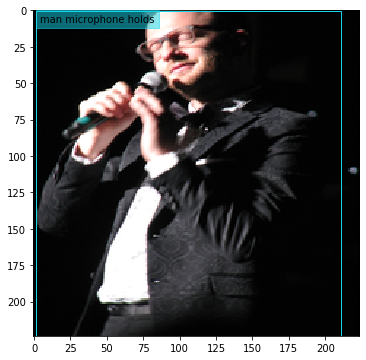

34fa22549cf01803


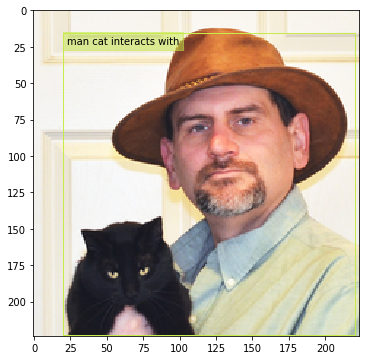

Predicted captions:
['man cat interacts with']
True captions:
['man cat interacts_with']


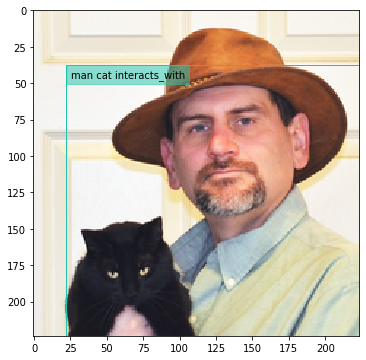

c181ac221a015ede


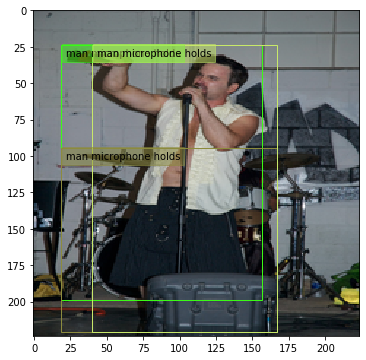

Predicted captions:
['man microphone holds', 'man microphone holds', 'man microphone holds']
True captions:
['man microphone holds']


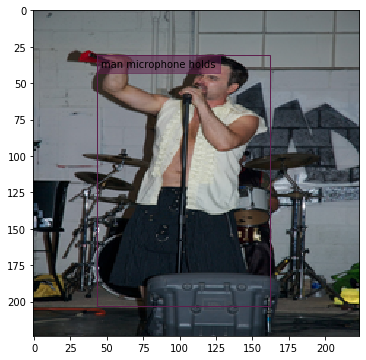

b39f3e86b16b40f9


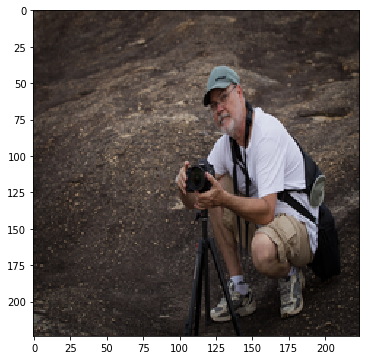

Predicted captions:
['man camera holds']
True captions:
['man camera holds']


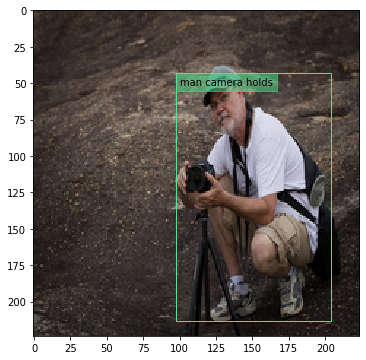

In [ ]:
for _ in range(10):
    generate_caption_train_show(np.random.choice(test_ids), test=True, reload=True, matched=False)

***

In [201]:
%%time
iou_eval = {}
for threshold in [round(0.1*p, ndigits=3) for p in range(11)]:
    correct = []
    for i, (relations, boxes) in enumerate(zip(testz_relationship_list_joined, testz_bbox_list)):
        correct_one = []
        for relation, box in zip(relations, boxes):
            predicted = False
            for (pred_rel, _) , pred_box in zip(trainz_predictions[i], set(rel_dbboxess[-n_test:][i])):
                if len(trainz_predictions[i]) != len(set(rel_dbboxess[-n_test:][i])):
                    print("uh oh stinky")
                    break
                if len(pred_box) == 0:
                    pred_box = [0,1,0,1]
                pred_rel_s= pred_rel.strip().replace('inside of', 'inside_of').replace('interacts with', 'interacts_with')
                predicted = predicted or (pred_rel_s == relation and compute_iou(box, pred_box) >= threshold)
            correct_one.append(predicted)
        correct.append(correct_one)
    iou_eval[threshold] = (sum([rel for rels in correct for rel in rels]) / len(correct)) * 100
len(correct)

Wall time: 3min 4s


5700

In [202]:
iou_eval

{0.0: 37.70175438596491,
 0.1: 37.70175438596491,
 0.2: 37.70175438596491,
 0.3: 37.6140350877193,
 0.4: 37.57894736842105,
 0.5: 37.26315789473684,
 0.6: 36.84210526315789,
 0.7: 35.6140350877193,
 0.8: 32.68421052631579,
 0.9: 25.070175438596493,
 1.0: 0.0}

(0, 39.58684210526316)

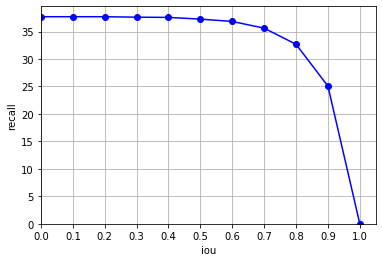

In [203]:
plt.plot(list(iou_eval.keys()), list(iou_eval.values()), 'bo-')
plt.grid()
plt.xlabel('iou')
plt.ylabel('recall')
plt.xticks(list(iou_eval.keys()))
plt.xlim(0)
plt.ylim(0)